# Initialization


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.exceptions import DataConversionWarning
import itertools

Hiding data conversion warnings generated by standard scaler.
Standard scaler expects float as input and converts input to float throwing a warning message.

In [2]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


Running MLP on the entire dataset of 60K records.

In [3]:
train_url='https://github.com/shobhitshah/MNIST-digit-recognizer/blob/develop/data/mnist-in-csv/mnist_train.csv.zip?raw=true'
test_url='https://github.com/shobhitshah/MNIST-digit-recognizer/blob/develop/data/mnist-in-csv/mnist_test.csv.zip?raw=true'
train = pd.read_csv(train_url, compression='zip')
test = pd.read_csv(test_url, compression='zip')

train.shape

(60000, 785)

In [4]:
train.sample(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
8505,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38906,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35353,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11302,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature selection

In [5]:
y_train=train.label.values
X_train=train.drop('label', axis=1).values
X_test = test.drop('label', axis=1).values
y_test = test.label.values

# Define model

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128,10), max_iter=200, alpha=1e-4,
                    solver='adam', verbose=False, tol=1e-4, random_state=1,
                    learning_rate_init=.001)


# Model fitting and prediction

In [7]:
def model_score(model, X, y):
    score = model.score(X, y)
    return score

In [8]:
def model_fit(model, X_train, y_train):
    cv_scores = []
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    for train, val in kfold.split(X_train, y_train):
        model.fit(X_train[train], y_train[train])
        cv_score = model_score(model, X_train[val], y_train[val])
        print("Validation score for classifier... %.4f" % cv_score)
        cv_scores.append(cv_score)
    return cv_scores

## Comparaing model performance on scaled and unscaled features
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [9]:
def cv_fit_and_predict(model, X_train, y_train, X_test, y_test):
    results = []
    val_results = []
    print("Processing model: ", model)
    clf = make_pipeline(StandardScaler(), model)
 
    cv_scores = model_fit(clf, X_train, y_train)
    val_results.append((model, cv_scores))

    print("Generating test scores for classifier... ")

    score = model_score(clf, X_test, y_test)
    print("Test score for classifier... %.4f" % score)
    results.append((model, score))
    print("Done")
    return results, val_results


In [10]:
results, val_results = cv_fit_and_predict(mlp, X_train, y_train, X_test, y_test)

Processing model:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 128, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Validation score for classifier... 0.9744
Validation score for classifier... 0.9775
Validation score for classifier... 0.9765
Validation score for classifier... 0.9767
Validation score for classifier... 0.9744
Generating test scores for classifier... 
Test score for classifier... 0.9770
Done


# Visualization of MLP weights
Acknowledgments - https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

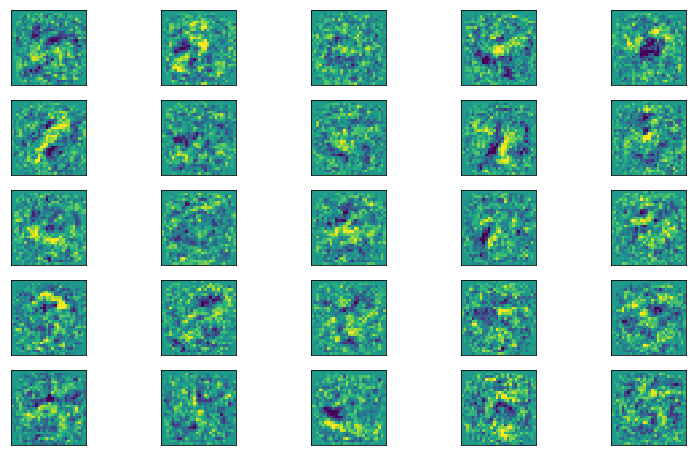

In [24]:
fig, axes = plt.subplots(5, 5, figsize=(13, 8))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.grid(False)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [21]:
mlp.coefs_[0].shape

(784, 128)

In [23]:
mlp.coefs_[0].T.shape

(128, 784)